---
# 춘천시 빅데이터 공모전
---

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import plotly.graph_objects as go
import plotly.express as px

plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 맑은 고딕
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = 15, 10

# 폴리움임포트
import folium
from folium.plugins import MarkerCluster
import json # for 코로플리쓰 

---
# Naver, 통합 검색어 트렌드
---

In [2]:
# 춘천, 워케이션, 휴가, 숙박, 여행, 숙소, 관광, 쇼핑, 맛집

import os
import sys
import urllib.request
client_id = "cFV0OjBrzb63Ez2dQODV"
client_secret = "S7Jk5bCJPy"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-07-01\",\"endDate\":\"2022-09-02\",\"timeUnit\":\"week\",\"keywordGroups\":[{\"groupName\":\"춘천\",\"keywords\":[\"춘천\",\"워케이션\",\"휴가\", \"숙박\", \"여행\", \"숙소\", \"관광\", \"쇼핑\", \"맛집\" ]}], \"device\": \"pc\", \"ages\":[\"3\",\"4\",\"5\",\"6\"]}";
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
else:
    pass

In [3]:
import os
import sys
import urllib.request
client_id = "cFV0OjBrzb63Ez2dQODV"
client_secret = "S7Jk5bCJPy"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-07-01\",\"endDate\":\"2022-09-02\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"춘천\",\"keywords\":[\"춘천\",\"워케이션\", \"호텔\", \"숙박\", \"숙소\"]}], \"device\": \"pc\", \"ages\":[\"3\",\"4\",\"5\",\"6\"]}";
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
else:
    pass

In [4]:
choon_pc = json.loads(response_body.decode('utf-8'))

import os
import sys
import urllib.request
client_id = "cFV0OjBrzb63Ez2dQODV"
client_secret = "S7Jk5bCJPy"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-07-01\",\"endDate\":\"2022-09-02\",\"timeUnit\":\"week\",\"keywordGroups\":[{\"groupName\":\"춘천\",\"keywords\":[\"춘천\",\"워케이션\",\"휴가\", \"숙박\", \"여행\", \"숙소\", \"관광\"]}], \"device\": \"mo\", \"ages\":[\"3\",\"4\",\"5\",\"6\"]}";
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
else:
    pass

In [5]:
import os
import sys
import urllib.request
client_id = "cFV0OjBrzb63Ez2dQODV"
client_secret = "S7Jk5bCJPy"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-07-01\",\"endDate\":\"2022-09-02\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"춘천\",\"keywords\":[\"춘천\",\"워케이션\", \"호텔\", \"숙박\", \"숙소\"]}], \"device\": \"mo\", \"ages\":[\"3\",\"4\",\"5\",\"6\"]}";
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
else:
    pass

In [6]:
choon_mo = json.loads(response_body.decode('utf-8'))

---
### choon_pc // pc집계
### choon_mo // mobile집계
---

In [87]:
pc_list = choon_pc['results'][0]
mo_list = choon_mo['results'][0]

In [88]:
pc_list['title']
pc_list['keywords']
list(pc_list['data'][0].values())[0]
list(mo_list['data'][0].values())[1]

55.67258

In [89]:
# 4) 데이터 정제 > 2차원 리스트
result_list = []

for i in range(len(pc_list['data'])):
    date = list(pc_list['data'][i].values())[0]
    pc_rate = list(pc_list['data'][i].values())[1]
    mo_rate = list(mo_list['data'][i].values())[1]
    
    result_list.append([date, pc_rate, mo_rate])

In [90]:
df = pd.DataFrame(result_list, columns = ('date', 'pc_rate', 'mo_rate'))
df.head(0)

,date,pc_rate,mo_rate


In [91]:
df.date = pd.to_datetime(df['date'])

In [92]:
df2017pc = df[df['date'].dt.year == 2017]
df2018 = df[df['date'].dt.year == 2018]
df2019 = df[df['date'].dt.year == 2019]
df2020 = df[df['date'].dt.year == 2020]
df2021 = df[df['date'].dt.year == 2021]
df2022 = df[df['date'].dt.year == 2021]

In [93]:
df2018.head(), df2019.head(), df2020.head(), df2021.head()

(         date   pc_rate   mo_rate
 6  2018-01-01  71.21221  39.09486
 7  2018-02-01  59.91477  39.32210
 8  2018-03-01  69.14587  37.06927
 9  2018-04-01  71.67821  38.06157
 10 2018-05-01  77.03415  42.37026,
          date   pc_rate   mo_rate
 18 2019-01-01  68.42847  43.73975
 19 2019-02-01  59.56833  42.61659
 20 2019-03-01  62.72916  42.95419
 21 2019-04-01  69.82954  43.81472
 22 2019-05-01  70.81366  44.71483,
          date   pc_rate   mo_rate
 30 2020-01-01  52.49555  51.91476
 31 2020-02-01  51.33975  61.37870
 32 2020-03-01  41.69170  40.88390
 33 2020-04-01  59.16978  53.45095
 34 2020-05-01  48.89018  48.05682,
          date   pc_rate   mo_rate
 42 2021-01-01  42.81378  45.85568
 43 2021-02-01  46.47740  50.62909
 44 2021-03-01  53.17309  47.00305
 45 2021-04-01  53.86596  48.23657
 46 2021-05-01  58.21938  53.80578)

In [94]:
# 춘천과 여행관련하여 pc검색이 높았던 시점
df[df.pc_rate == 100]

,date,pc_rate,mo_rate
0,2017-07-01,100.0,55.67258


In [95]:
# 춘천과 여행관련하여 mobile검색이 높았던 시점
df[df.mo_rate == 100]

,date,pc_rate,mo_rate
37,2020-08-01,91.25329,100.0


In [96]:
df2018 = df2018.groupby('date').mean().reset_index()
df2019 = df2019.groupby('date').mean().reset_index()

In [97]:
df

,date,pc_rate,mo_rate
0,2017-07-01,100.00000,55.67258
1,2017-08-01,84.79980,50.56902
2,2017-09-01,71.09571,38.61244
3,2017-10-01,60.32252,39.92000
4,2017-11-01,69.10601,34.31213
...,...,...,...
58,2022-05-01,78.86136,66.50089
59,2022-06-01,79.44693,71.80934
60,2022-07-01,93.73045,85.89442
61,2022-08-01,81.71868,78.72383


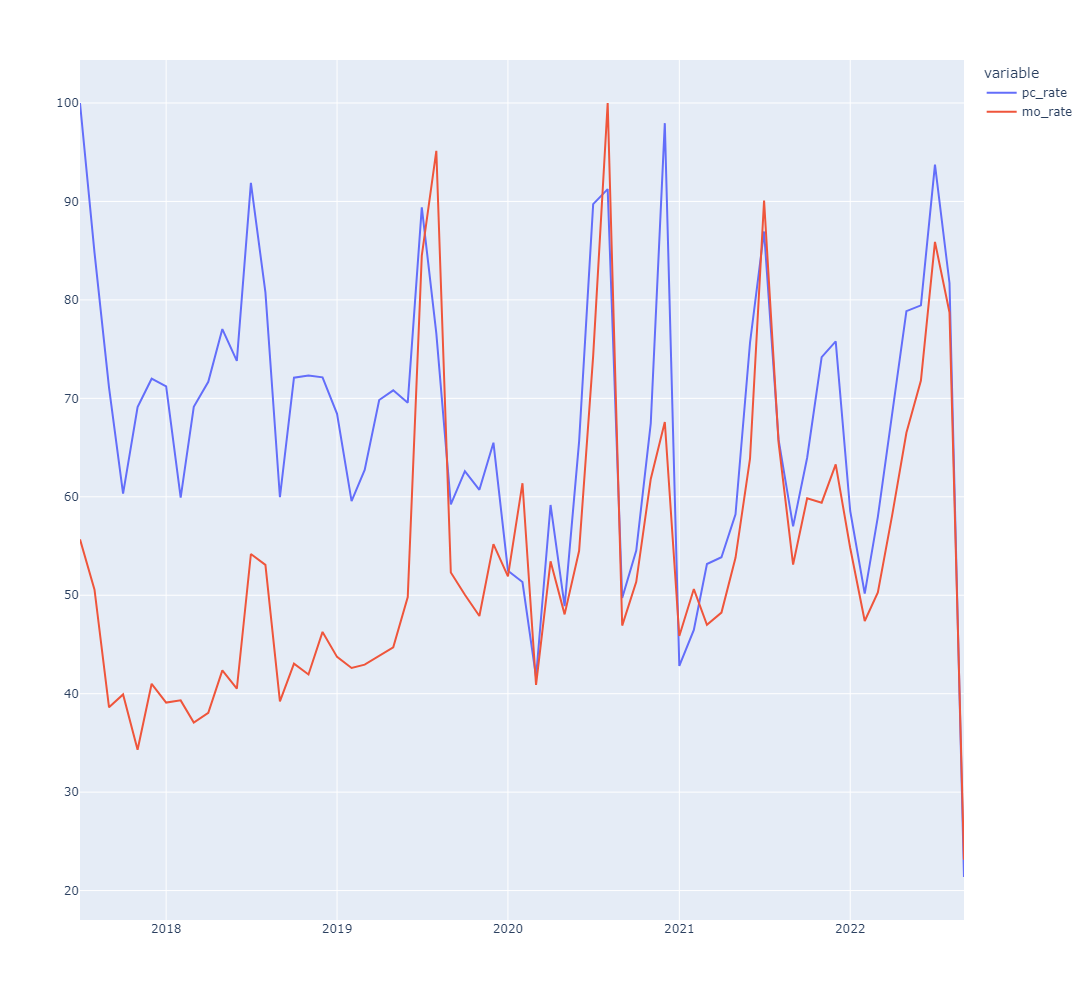

In [100]:
fig1 = px.line(data_frame=df, x= df.date, y = ['pc_rate', 'mo_rate'])
fig1.update_layout(title_text="", height = 1000)
fig1.update_xaxes(title_text ='')
fig1.update_yaxes(title_text ='')
fig1.show()

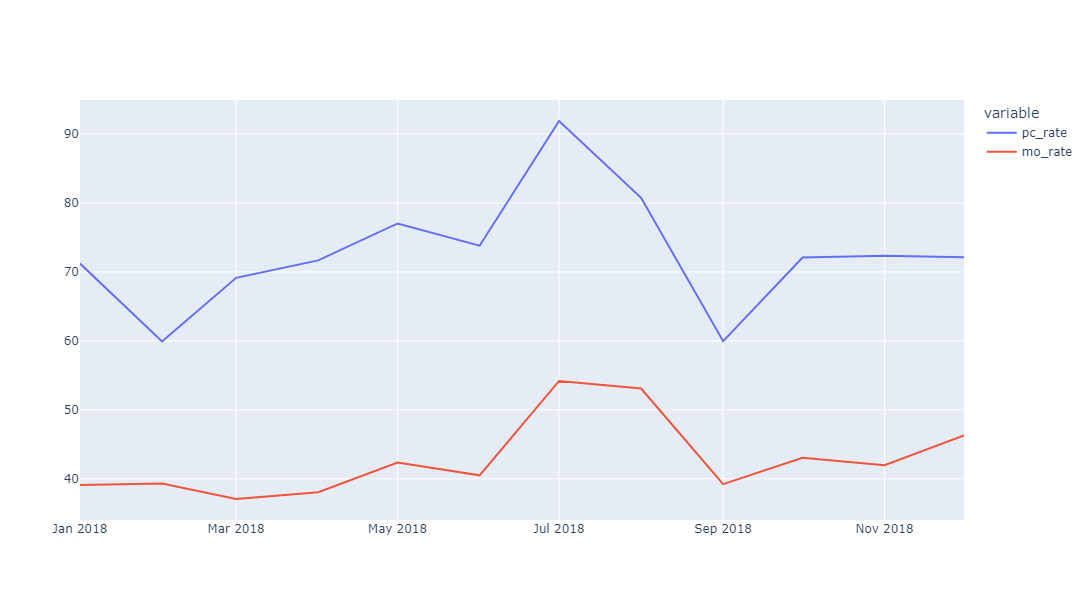

In [101]:
fig2018 = px.line(data_frame=df2018, x = 'date', y = ['pc_rate', 'mo_rate'], title='검색 트렌드 2018')
fig2018.update_layout(title_text="", height = 600)
fig2018.update_xaxes(title_text ='')
fig2018.update_yaxes(title_text ='')
fig2018.show()

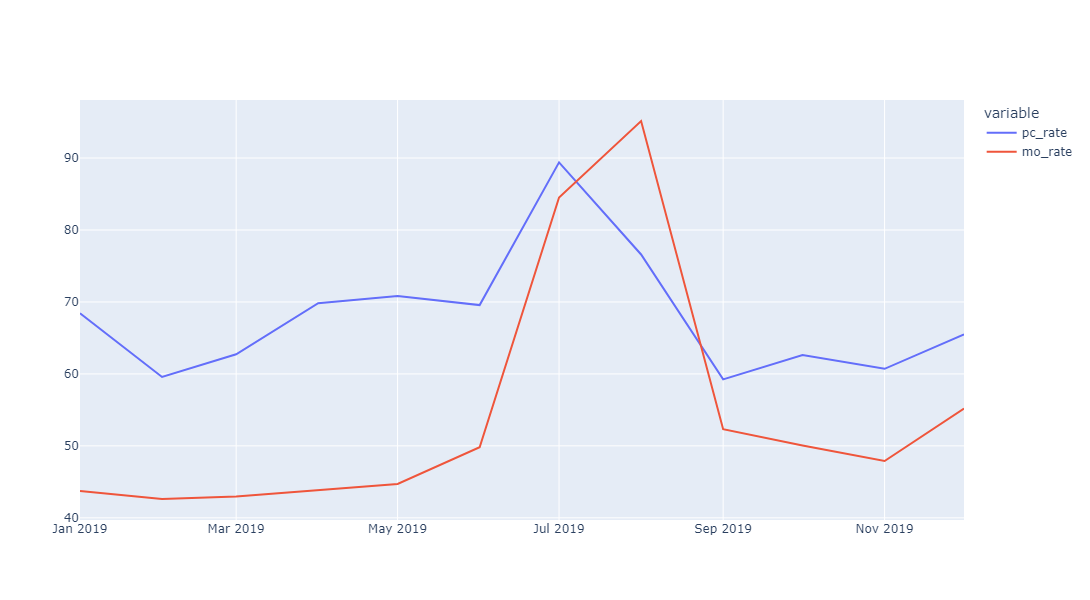

In [102]:
fig2019 = px.line(data_frame=df2019, x = 'date', y = ['pc_rate', 'mo_rate'], title='검색 트렌드 2019')
fig2019.update_layout(title_text="", height = 600)
fig2019.update_xaxes(title_text ='')
fig2019.update_yaxes(title_text ='')
fig2019.show()

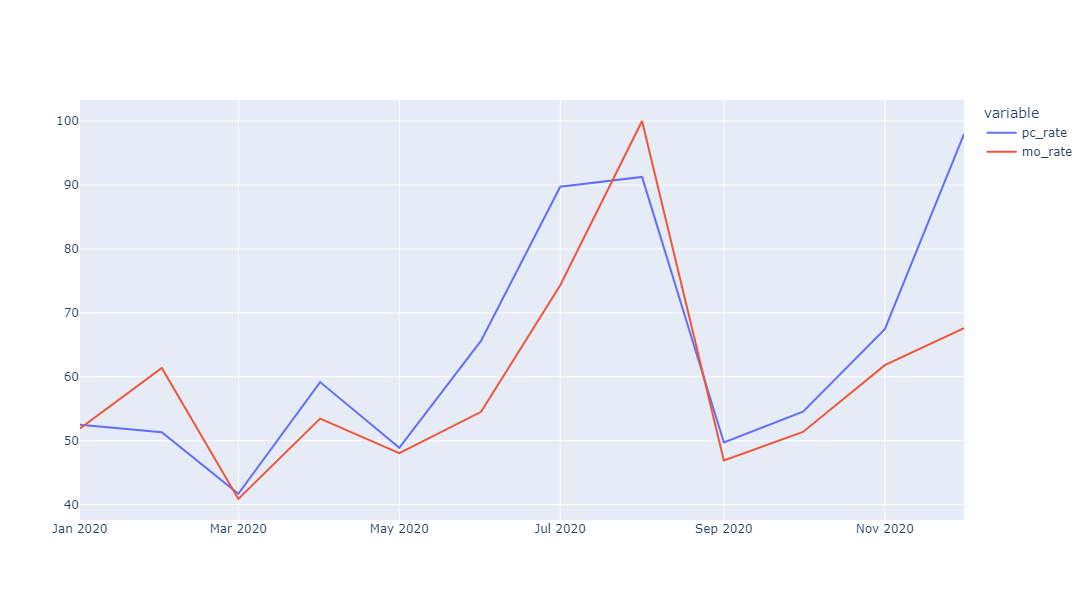

In [103]:
fig2020 = px.line(data_frame=df2020, x = 'date', y = ['pc_rate', 'mo_rate'], title='검색 트렌드 2020')
fig2020.update_layout(title_text="", height = 600)
fig2020.update_xaxes(title_text ='')
fig2020.update_yaxes(title_text ='')
fig2020.show()

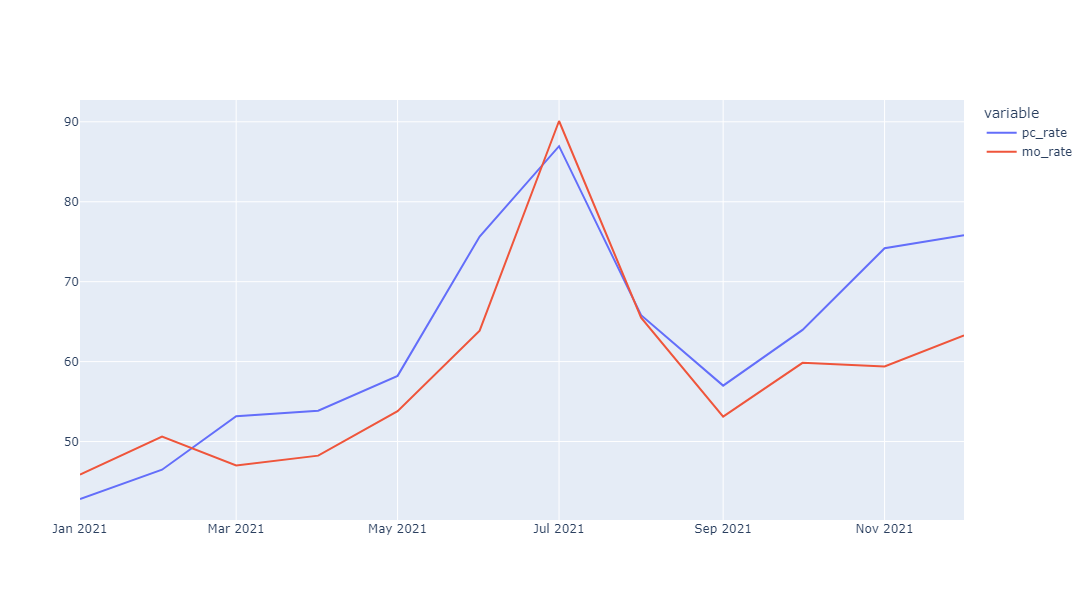

In [104]:
fig2021 = px.line(data_frame=df2021, x = 'date', y = ['pc_rate', 'mo_rate'], title='검색 트렌드 2021')
fig2021.update_layout(title_text="", height = 600)
fig2021.update_xaxes(title_text ='')
fig2021.update_yaxes(title_text ='')
fig2021.show()

In [22]:
search = pd.read_csv('data/강원도 춘천시 월별 sns 검색량.csv')
search

,기준연월,지역명(시),sns검색량(시),지역명(도),sns검색량(도)
0,201801,강원도 춘천시,4448,강원도,54616
1,201802,강원도 춘천시,2485,강원도,82184
2,201803,강원도 춘천시,2204,강원도,29894
3,201804,강원도 춘천시,6517,강원도,34105
4,201805,강원도 춘천시,5607,강원도,50476
5,201806,강원도 춘천시,4178,강원도,51493
6,201807,강원도 춘천시,5620,강원도,66399
7,201808,강원도 춘천시,6079,강원도,79920
8,201809,강원도 춘천시,3778,강원도,45138
9,201810,강원도 춘천시,4417,강원도,44031


In [23]:
search.기준연월 = pd.to_datetime(search.기준연월, format='%Y%m')

In [24]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기준연월       55 non-null     datetime64[ns]
 1   지역명(시)     55 non-null     object        
 2   sns검색량(시)  55 non-null     int64         
 3   지역명(도)     55 non-null     object        
 4   sns검색량(도)  55 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.3+ KB


In [25]:
search1 = search.drop(['지역명(시)', '지역명(도)'],axis=1)
search1.columns = ['기준연월', 'sns검색량', 'sns검색량(도)']
search1

,기준연월,sns검색량,sns검색량(도)
0,2018-01-01,4448,54616
1,2018-02-01,2485,82184
2,2018-03-01,2204,29894
3,2018-04-01,6517,34105
4,2018-05-01,5607,50476
5,2018-06-01,4178,51493
6,2018-07-01,5620,66399
7,2018-08-01,6079,79920
8,2018-09-01,3778,45138
9,2018-10-01,4417,44031


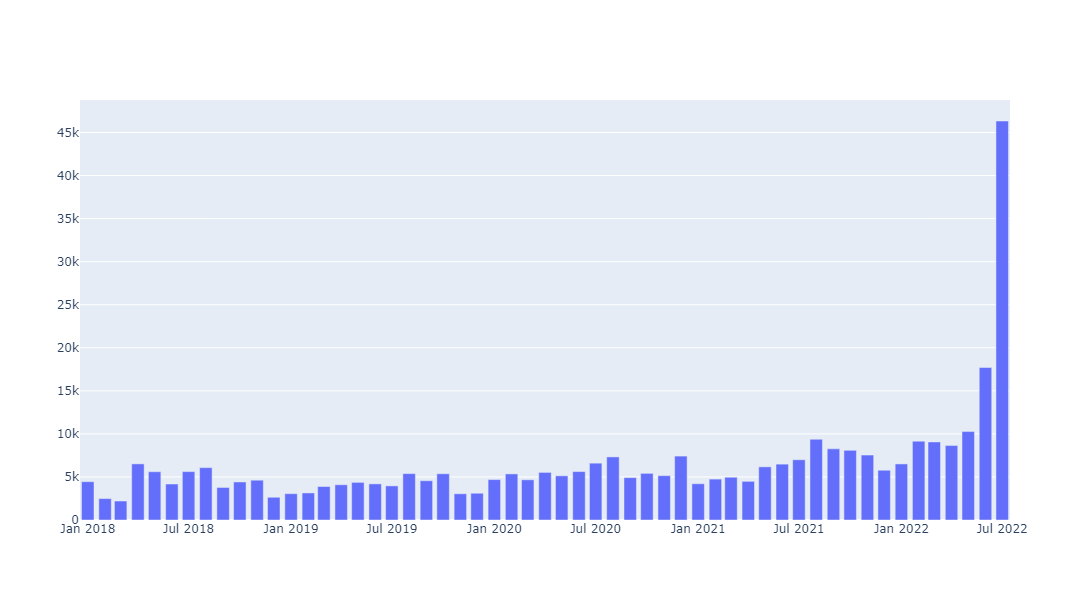

In [45]:
fig2 = px.bar(data_frame = search1, x = '기준연월', y= 'sns검색량', title = 'sns 검색추이')
fig2.update_layout(title_text="", height = 600)
fig2.update_xaxes(title_text ='')
fig2.update_yaxes(title_text ='')
fig2.show()

In [27]:
# 방문객수 160만 ~ 330만까지 지속수요가 있다. (한국관광공사 데이터랩)
visitor = pd.read_csv('data/강원도 춘천시 방문자수.csv', encoding='cp949')
visitor.head(3)

,기준연월,지역명,방문자 수
0,201907,강원도 춘천시,2710265
1,201908,강원도 춘천시,3327273
2,201909,강원도 춘천시,2855453


In [28]:
visitor.기준연월 = pd.to_datetime(visitor.기준연월, format='%Y%m')

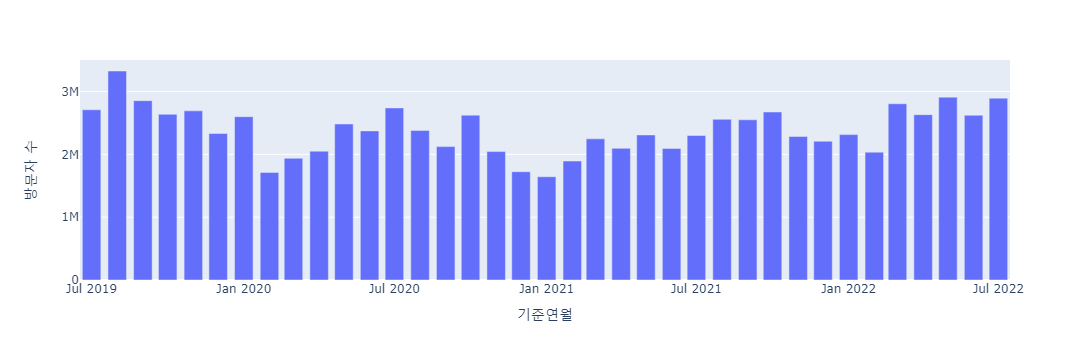

In [29]:
px.bar(data_frame=visitor, x = '기준연월', y= '방문자 수')

In [30]:
# 강원도 춘천시_숙박업소_20210909 공공데이터 포털 
motel_list = pd.read_csv('data/강원도 춘천시_숙박업소_20210909.csv', encoding='cp949')
motel_list

,업태,업소명,소재지도로명주소,소재지전화,데이터기준일자
0,여관업,거래처모텔,강원도 춘천시 서부대성로44번길 6 (요선동),033-252-2666,2021-09-09
1,관광호텔,춘천세종호텔,강원도 춘천시 봉의산길 31 (봉의동),033-252-1191,2021-09-09
2,여관업,춘양장모텔,강원도 춘천시 당간지주길 94 (소양로1가),033-254-3563,2021-09-09
3,여인숙업,대성여인숙,강원도 춘천시 가연길5번길 24 (소양로4가),033-256-6553,2021-09-09
4,여관업,동성여관,강원도 춘천시 중앙로166번길 4 (근화동),033-254-2944,2021-09-09
...,...,...,...,...,...
615,민박,샤크 아일랜드,강원도 춘천시 남산면 방하로 1163,NaN,2021-09-09
616,민박,데일리 랜드,강원도 춘천시 동산면 윗성골길 58,NaN,2021-09-09
617,민박,데일리 랜드,강원도 춘천시 동산면 윗성골길 60,NaN,2021-09-09
618,민박,데일리 랜드,강원도 춘천시 동산면 윗성골길 62,NaN,2021-09-09


In [31]:
motel_list.소재지도로명주소[0].split(' ')

['강원도', '춘천시', '서부대성로44번길', '6', '(요선동)']

In [32]:
motel_list.소재지도로명주소[600].split(' ')

['강원도', '춘천시', '남산면', '강촌로', '172']

In [33]:
motel_list['소재지도로명주소'].str.endswith(')')

0       True
1       True
2       True
3       True
4       True
       ...  
615    False
616    False
617    False
618    False
619    False
Name: 소재지도로명주소, Length: 620, dtype: bool

In [34]:
k = pd.DataFrame(motel_list.groupby('업태')['업소명'].count())
k = k.reset_index()
k = k.sort_values('업소명', ascending=False)
k.columns = ['업태', '개수']
k

,업태,개수
1,민박,391
4,여관업,184
3,숙박업(생활),16
5,여인숙업,14
6,일반호텔,9
0,관광호텔,4
2,숙박업 기타,2


In [35]:
k

,업태,개수
1,민박,391
4,여관업,184
3,숙박업(생활),16
5,여인숙업,14
6,일반호텔,9
0,관광호텔,4
2,숙박업 기타,2


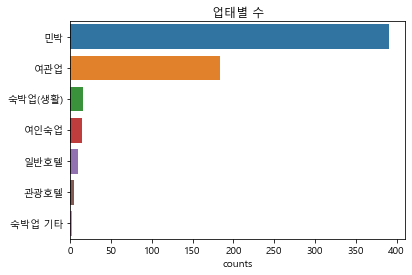

In [36]:
sns.barplot(y=k.업태, x=k.개수)
plt.title('업태별 수')
plt.ylabel('')
plt.xlabel('counts')
plt.show()

In [37]:
pd.read_csv('data/강원도, 춘천시 방문자수, 검색량.csv')

,기준연월,지역명(춘천시),sns검색량(춘천시),방문자수(춘천시),지역명(강원도),sns검색량(강원도),방문자수(강원도)
0,201801,강원도 춘천시,4448,1761324,강원도,54616,10300000.0
1,201802,강원도 춘천시,2485,1981519,강원도,82184,10800000.0
2,201803,강원도 춘천시,2204,2146043,강원도,29894,10100000.0
3,201804,강원도 춘천시,6517,2343161,강원도,34105,9027871.0
4,201805,강원도 춘천시,5607,2534229,강원도,50476,11300000.0
5,201806,강원도 춘천시,4178,2078257,강원도,51493,10700000.0
6,201807,강원도 춘천시,5620,1831875,강원도,66399,13600000.0
7,201808,강원도 춘천시,6079,2380034,강원도,79920,16800000.0
8,201809,강원도 춘천시,3778,2739357,강원도,45138,12600000.0
9,201810,강원도 춘천시,4417,2455266,강원도,44031,11100000.0
